In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'D:\alessia\Instacart basket Analysis - Alessia'

In [4]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final.pkl'))

In [29]:
df

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,State,Age,date_joined,n_dependants,fam_status,income,Region,activity_of_customer,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High order customer,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High order customer,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High order customer,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High order customer,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High order customer,beverages
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30964559,525976,58201,24,6,16,3.0,5161,1,1,Dried Mango,...,Male,Florida,75,2/8/2019,2,married,138066,South,High order customer,bulk
30964560,758290,58201,26,0,12,9.0,5161,1,1,Dried Mango,...,Male,Florida,75,2/8/2019,2,married,138066,South,High order customer,bulk
30964561,460711,58201,27,6,9,13.0,5161,1,1,Dried Mango,...,Male,Florida,75,2/8/2019,2,married,138066,South,High order customer,bulk
30964562,1605789,58201,28,5,7,27.0,5161,1,1,Dried Mango,...,Male,Florida,75,2/8/2019,2,married,138066,South,High order customer,bulk


## Items by Price Range

In [30]:
df['price_range_loc'].value_counts()

Mid-range product    20891771
Low-range product     9459067
Name: price_range_loc, dtype: int64

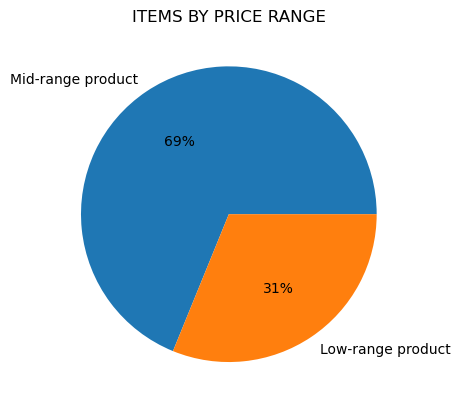

In [31]:
items_by_price_range=df['price_range_loc'].value_counts().plot.pie(title='ITEMS BY PRICE RANGE',label='',autopct=('%1.f%%'))

In [32]:
items_by_price_range.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','items_by_price_range.png'))

## Most popular departments

In [33]:
df['department'].value_counts(dropna=False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

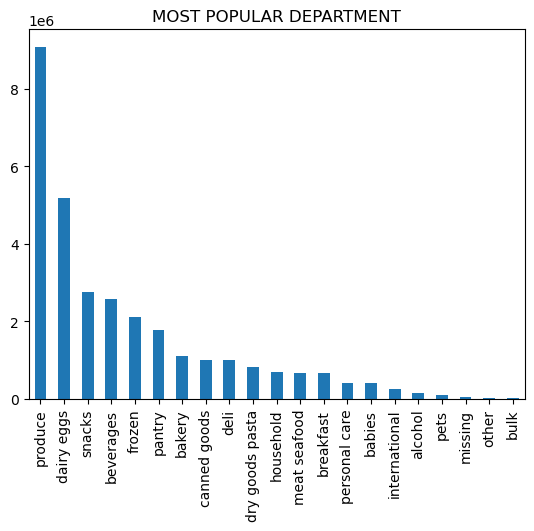

In [34]:
popular_department=df['department'].value_counts(dropna=False).plot.bar()
plt.title('MOST POPULAR DEPARTMENT')
plt.show()

In [35]:
popular_department.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','most_popular_department.png'))

## Loyalty by department

In [36]:
loyalty_by_department=pd.crosstab(df['department'],df['loyalty_flag'],dropna=False)

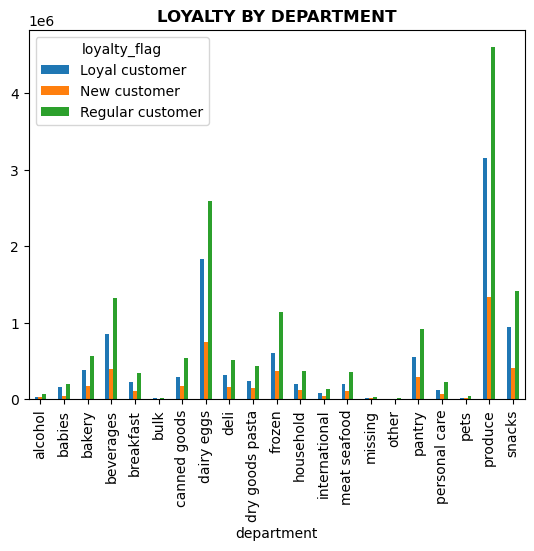

In [37]:
loyalty_dept=loyalty_by_department.plot.bar()
plt.title('LOYALTY BY DEPARTMENT',fontweight='bold')
plt.show()


In [38]:
loyalty_dept.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','loyalty_by_department.png'))

# Region by department

In [39]:
region_by_department=pd.crosstab(df['department'],df['Region'],dropna=False)

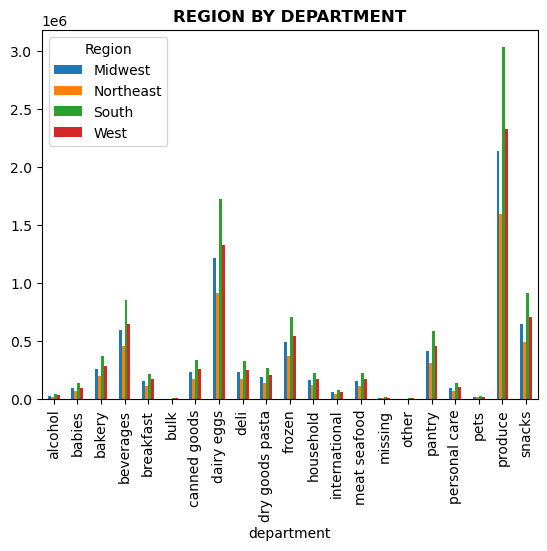

In [40]:
region_by_dept=region_by_department.plot.bar()
plt.title('REGION BY DEPARTMENT',fontweight='bold')
plt.show()


In [41]:
region_by_dept.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','region_by_department.png'))

# Loyalty by age

In [54]:
df.loc[df['Age']>60,'age_flag']='Senior'
df.loc[(df['Age']<=60) & (df['Age']>40),'age_flag']='Middle-age'
df.loc[df['Age']<=40,'age_flag']='Young adult'

In [55]:
df['age_flag'].value_counts(dropna=False)

Young adult    11148433
Senior         10112607
Middle-age      9703524
Name: age_flag, dtype: int64

In [56]:
loyalty_by_age=pd.crosstab(df['age_flag'],df['loyalty_flag'],dropna=False)

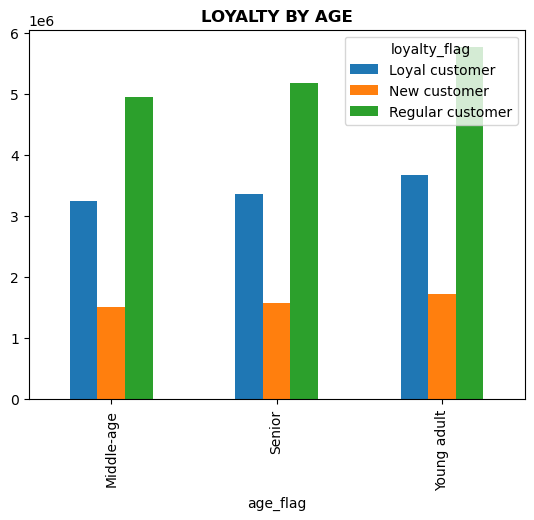

In [57]:
loyalty_age=loyalty_by_age.plot.bar()
plt.title('LOYALTY BY AGE',fontweight='bold')
plt.show()


In [58]:
loyalty_age.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','loyalty_age.png'))

# Loyalty by family status

In [59]:
loyalty_by_family_status=pd.crosstab(df['fam_status'],df['loyalty_flag'],dropna=False)

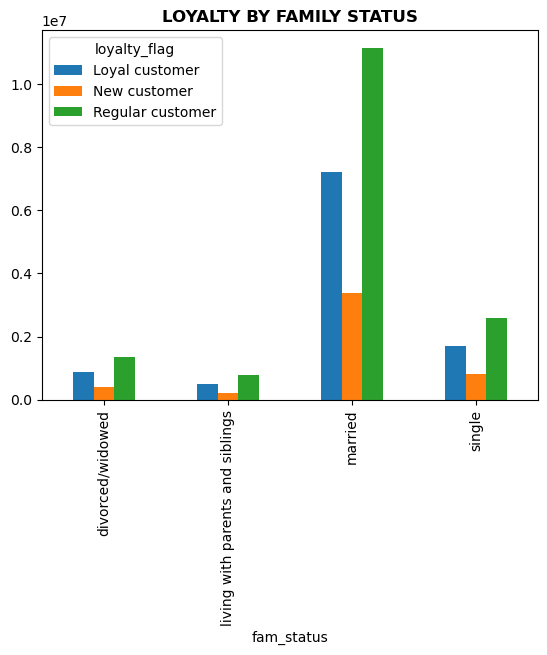

In [60]:
loyalty_fam_status=loyalty_by_family_status.plot.bar()
plt.title('LOYALTY BY FAMILY STATUS',fontweight='bold')
plt.show()

In [61]:
loyalty_fam_status.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','loyalty_fam_status.png'))